# 9 绘图实例(1) Drawing example(1)
本文主要讲述seaborn官网相关函数绘图实例。具体内容有：
1. Anscombe’s quartet(lmplot)
2. Color palette choices(barplot)
3. Different cubehelix palettes(kdeplot)
4. Distribution plot options(distplot)
5. Timeseries plot with error bands(lineplot)
6. FacetGrid with custom projection(FacetGrid)
7. Facetting histograms by subsets of data(FacetGrid)
8. Line plots on multiple facets(relplot)
9. Grouped barplots(catplot)
10. Grouped boxplots(boxplot)

In [1]:
# import packages
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all" 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="ticks")

## 1. Anscombe’s quartet(lmplot)

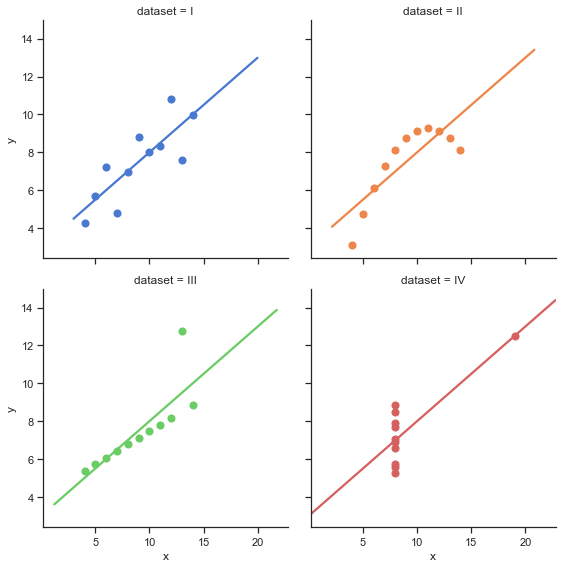

In [2]:
# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")
df.head()
# Show the results of a linear regression within each dataset 显示各组的回归拟合结果
# col确认分组类别，hue设置绘图颜色类别.col_wrap设置每行多少图像
# ci置信区间大小，palette颜色设置,height设置每张图的尺寸
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1});

## 2. Color palette choices(barplot)

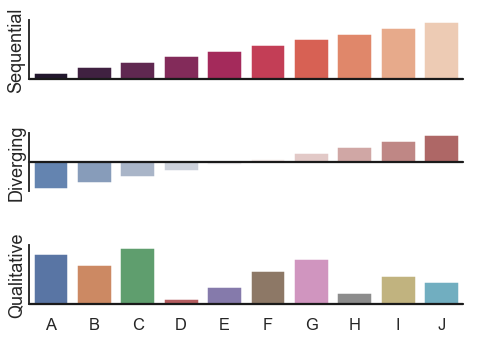

In [3]:
#context控制上下文本参数
sns.set(style="white", context="talk")
rs = np.random.RandomState(8)
# Set up the matplotlib figure 设置matplotlib绘图参数
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 5), sharex=True)

# Generate some sequential data 建立数据集
x = np.array(list("ABCDEFGHIJ"))
y1 = np.arange(1, 11)

# 第一个条形图
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1);
# 绘制平行于x轴的水平参考线
ax1.axhline(0, color="k", clip_on=False)
# 添加标签
ax1.set_ylabel("Sequential")

# Center the data to make it diverging
y2 = y1 - 5.5
sns.barplot(x=x, y=y2, palette="vlag", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Diverging")

# Randomly reorder the data to make it qualitative 生成数据
y3 = rs.choice(y1, len(y1), replace=False)
sns.barplot(x=x, y=y3, palette="deep", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Qualitative")

# Finalize the plot 绘图最后参数调整
# 去掉了上、右和下边界。注意，这里despine()函数默认会去除上方和右侧的边界，
# 如果想要去掉左边和下方的边界，就需要额外指定left=True, bottom=True
sns.despine(bottom=True)
# 去除了所有的纵轴刻度尺
plt.setp(f.axes, yticks=[])
# ight_layout设置了每行坐标轴（子图）之间的间隔，h_pad确定上下间隔
plt.tight_layout(h_pad=2)

## 3. Different cubehelix palettes(kdeplot)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


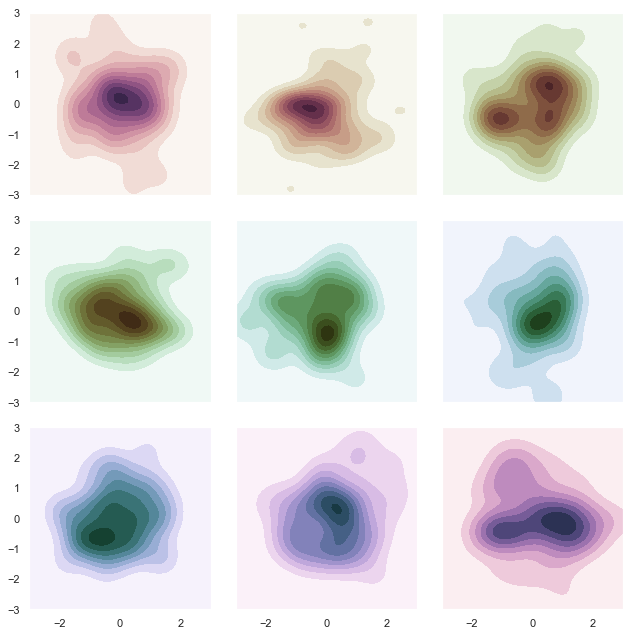

In [4]:
sns.set(style="dark")
rs = np.random.RandomState(50)

# Set up the matplotlib figure 设置图像
f, axes = plt.subplots(3, 3, figsize=(9, 9), sharex=True, sharey=True)

# Rotate the starting point around the cubehelix hue circle
for ax, s in zip(axes.flat, np.linspace(0, 3, 10)):

    # Create a cubehelix colormap to use with kdeplot 颜色设置
    cmap = sns.cubehelix_palette(start=s, light=1, as_cmap=True)

    # Generate and plot a random bivariate dataset
    x, y = rs.randn(2, 50)
    # 核函数估计图制作
    sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=ax)
    ax.set(xlim=(-3, 3), ylim=(-3, 3))

f.tight_layout()

## 4. Distribution plot options(distplot)

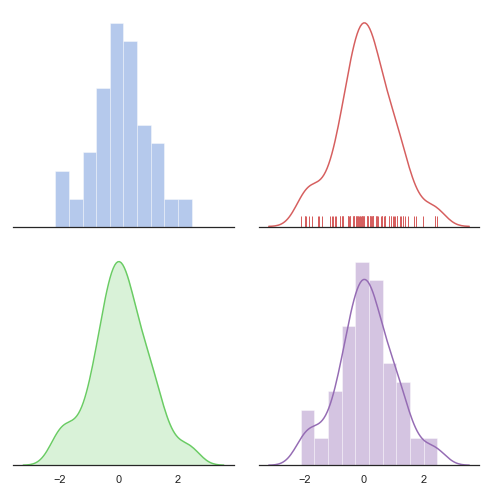

In [5]:
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)

# Set up the matplotlib figure 设置matplolitlib参数
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
# 去除边框
sns.despine(left=True)

# Generate a random univariate dataset
d = rs.normal(size=100)

# Plot a simple histogram with binsize determined automatically  直方图
sns.distplot(d, kde=False, color="b", ax=axes[0, 0])

# Plot a kernel density estimate and rug plot 画核密度曲线
sns.distplot(d, hist=False, rug=True, color="r", ax=axes[0, 1])

# Plot a filled kernel density estimate
sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])

# Plot a historgram and kernel density estimate
sns.distplot(d, color="m", ax=axes[1, 1])

# 隐藏y轴
plt.setp(axes, yticks=[])
plt.tight_layout()

## 5. Timeseries plot with error bands(lineplot)

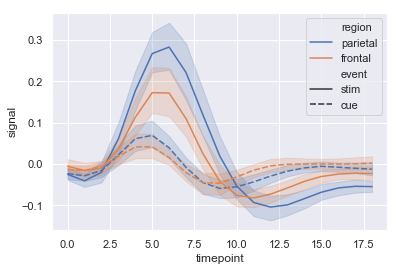

In [6]:
sns.set(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions 线条图
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             #置信区间设置
             #ci=None,
             data=fmri);

## 6. FacetGrid with custom projection(FacetGrid)

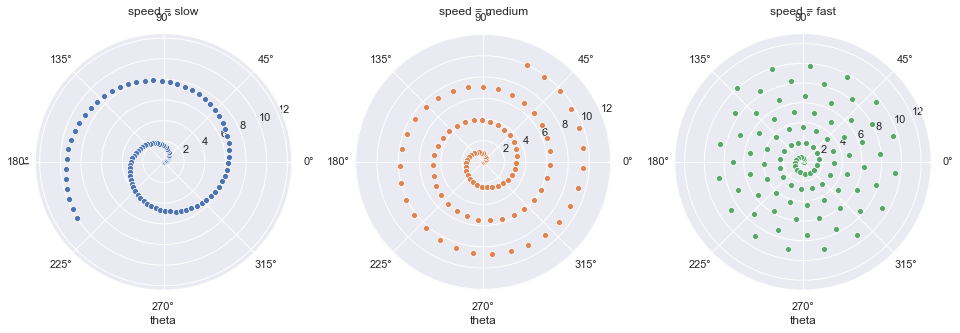

In [7]:
sns.set()

# Generate an example radial datast 随机生成数据
r = np.linspace(0, 10, num=100)
df = pd.DataFrame({'r': r, 'slow': r, 'medium': 2 * r, 'fast': 4 * r})

# Convert the dataframe to long-form or "tidy" format
df = pd.melt(df, id_vars=['r'], var_name='speed', value_name='theta')

# Set up a grid of axes with a polar projection 建立坐标轴
# col表示使用什么分图，这里是speed，并用hue设置不同类对应不同颜色
# subplot_kws确定坐标类型，这里是极坐标
g = sns.FacetGrid(df, col="speed", hue="speed",
                  subplot_kws=dict(projection='polar'), height=4.5,
                  sharex=False, sharey=False, despine=False)

# Draw a scatterplot onto each axes in the grid
# 在实例化后的坐标轴上画图
g.map(sns.scatterplot, "theta", "r");

## 7. FacetGrid with custom projection(FacetGrid)

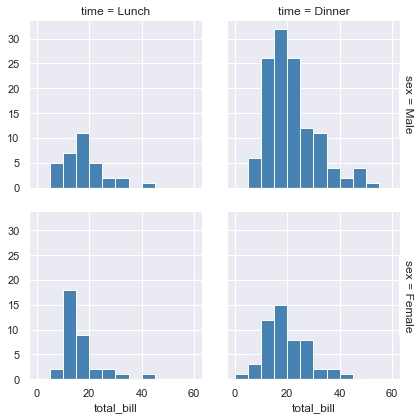

In [8]:
sns.set(style="darkgrid")

tips = sns.load_dataset("tips")
# 初始化坐标轴，margin_titles行变量的标题被绘制到最后一列的右侧
g = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "total_bill", color="steelblue", bins=bins);

## 8. Line plots on multiple facets(relplot)

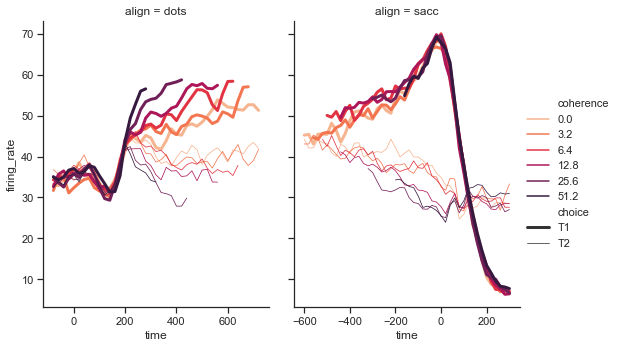

In [9]:
sns.set(style="ticks")

dots = sns.load_dataset("dots")

# Define a palette to ensure that colors will be
# shared across the facets
# 设置颜色
palette = dict(zip(dots.coherence.unique(),
                   sns.color_palette("rocket_r", 6)))

# Plot the lines on two facets
sns.relplot(x="time", y="firing_rate",
            hue="coherence", size="choice", col="align",
            # size_order画图顺序
            size_order=["T1", "T2"], palette=palette,
            # aspect图的比例,facet_kws每个图参数设置
            height=5, aspect=0.75, facet_kws=dict(sharex=False),
            # kind画图类型，legend图例类型
            kind="line", legend="brief", data=dots);

## 9. Grouped barplots(catplot)

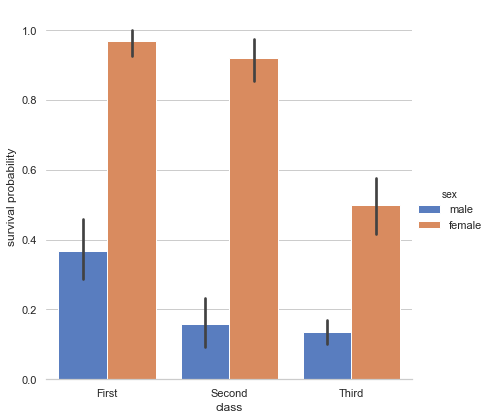

In [10]:
sns.set(style="whitegrid")

# Load the example Titanic dataset 读取数据
titanic = sns.load_dataset("titanic")

# Draw a nested barplot to show survival for class and sex
# catplot分类数据作图
g = sns.catplot(x="class", y="survived", hue="sex", data=titanic,
                height=6, kind="bar", palette="muted")
# 设置轴框
g.despine(left=True)
# 设置标签
g.set_ylabels("survival probability");

## 10. Grouped boxplots(boxplot)

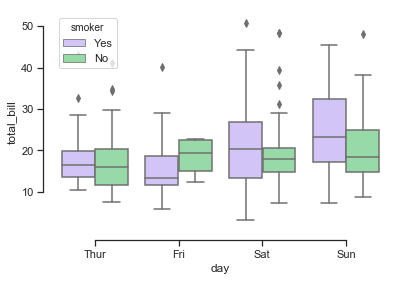

In [11]:
sns.set(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
# 画箱形图 hue颜色
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
# offset 两轴偏移绝对距离,trim只显示主要刻度
sns.despine(offset=10,trim=True)